In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from skimage import io
from skimage.feature import hog
from joblib import Parallel, delayed
#import cv2
#import glob
from scipy import signal
import seaborn as sns
import scipy as sp
from pandas import DataFrame as df
import scipy.stats as st
#load all data
pos1 = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/plane0/F.npy")
pos1_iscell = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/plane0/iscell.npy")
pos1_spks = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/plane0/spks.npy")
pos1_stat = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/plane0/stat.npy")
pos1_ops = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/ops1.npy")


#remove all non-cells
pos1_cellsF = pos1[pos1_iscell[:,0] == 1]
pos1_cellsS = pos1_spks[pos1_iscell[:,0] == 1]
pos1_stat = pos1_stat[pos1_iscell[:,0] == 1]


#convert all data to dataframes
pos1_cellsF = pd.DataFrame(pos1_cellsF)
pos1_cellsS = pd.DataFrame(pos1_cellsS)
pos1_stat = pd.DataFrame(pos1_stat)
pos1_ops = pd.DataFrame(pos1_ops)



#since suite2p stiches all exps together and img recording last longer than exps
#(tipically 7500 frames while exp only lasts 7178 frames as recorded by ThorSync)
#find frame# for each exp start by checking the number of frames in each stack/folder
pos1_2_recLen = 7178
pos1_cutStartVec = [0, 7500, 15000, 22500, 30002, 37502, 45002, 52502, 60002]
#pos2_cutStartVec = [0, 7477, 14977, 22477, 29977, 37477, 44977, 52477, 59977]



#slice stiched output from suite2p into experiments and remove all timepoints after exp/cameras stopped recording
#names correspond to stimulus substance given during that experiment 
pos1_h20_th_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[0] : (pos1_cutStartVec[0] + pos1_2_recLen)]
pos1_nacl75_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[1] : (pos1_cutStartVec[1] + pos1_2_recLen)]
pos1_nacl500_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[2] : (pos1_cutStartVec[2] + pos1_2_recLen)]
pos1_q01_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[3] : (pos1_cutStartVec[3] + pos1_2_recLen)]
pos1_q1_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[4] : (pos1_cutStartVec[4] + pos1_2_recLen)]
pos1_q10_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[5] : (pos1_cutStartVec[5] + pos1_2_recLen)]
pos1_suc1_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[6] : (pos1_cutStartVec[6] + pos1_2_recLen)]
pos1_suc4_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[7] : (pos1_cutStartVec[7] + pos1_2_recLen)]
pos1_suc20_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[8] : (pos1_cutStartVec[8] + pos1_2_recLen)]




#rename columns from original frame# out of whole stiched recording to 0:expLength
pos1_h20_th_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_nacl75_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_nacl500_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_q01_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_q1_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_q10_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_suc1_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_suc4_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_suc20_1_F.columns = range(pos1_h20_th_1_F.shape[1])



#import stimulus starts
shockStartsEmpathy_2s = [120*30, (120*2 + 1*2)*30, (120*3 + 2*2)*30]
shockStartsEmpathy_500ms = [120*30, (120*2 + 1*0.5)*30, (120*3 + 2*0.5)*30]
shockStartsEmpathy_500ms = [int(i) for i in shockStartsEmpathy_500ms]



NDn1_an1_pos1_h20_th_1 = np.zeros(14578)

#resample img data to fit the sampling rate of face data
# rows = neurons, columns = activity, upsampled from face data
pos1_h20_th_1_Fr = pd.DataFrame(signal.resample(pos1_h20_th_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_nacl75_1_Fr = pd.DataFrame(signal.resample(pos1_nacl75_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_nacl500_1_Fr = pd.DataFrame(signal.resample(pos1_nacl500_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_q01_1_Fr = pd.DataFrame(signal.resample(pos1_q01_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_q1_1_Fr = pd.DataFrame(signal.resample(pos1_q1_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_q10_1_Fr = pd.DataFrame(signal.resample(pos1_q10_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_suc1_1_Fr = pd.DataFrame(signal.resample(pos1_suc1_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_suc4_1_Fr = pd.DataFrame(signal.resample(pos1_suc4_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_suc20_1_Fr = pd.DataFrame(signal.resample(pos1_suc20_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))



C:\Users\adarcher\AppData\Local\conda\conda\envs\suite2p\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\adarcher\AppData\Local\conda\conda\envs\suite2p\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\adarcher\AppData\Local\conda\conda\envs\suite2p\lib\site-packages\scipy\signal\signaltools.py:2233: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

In [2]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
%matplotlib inline
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

In [3]:
def stim_slice(x):
    """
    Normalizes to pre-stim period for each stim presentation.
    -----
    returns: dataframes with the sliced and normalized signal
    """
    
    s1_r = x.iloc[:,3300:4200]; s2_r = x.iloc[:,6960:7860]; s3_r = x.iloc[:,10620:11520]
    s1_z = [(s1_r.iloc[i,:] - s1_r.iloc[i,:][:299].mean()) / s1_r.iloc[i,:][:299].std() for i in range(len(s1_r))]
    s2_z = [(s2_r.iloc[i,:] - s2_r.iloc[i,:][:299].mean()) / s2_r.iloc[i,:][:299].std() for i in range(len(s2_r))]
    s3_z = [(s3_r.iloc[i,:] - s3_r.iloc[i,:][:299].mean()) / s3_r.iloc[i,:][:299].std() for i in range(len(s3_r))]
    s1_z = pd.DataFrame(s1_z)
    s2_z = pd.DataFrame(s2_z)
    s3_z = pd.DataFrame(s3_z)
    return s1_z, s2_z, s3_z



In [4]:
x0 = pos1_h20_th_1_Fr

a, b, c = stim_slice(x0)

s_all_z = pd.DataFrame(np.concatenate((a, b, c), axis=0))

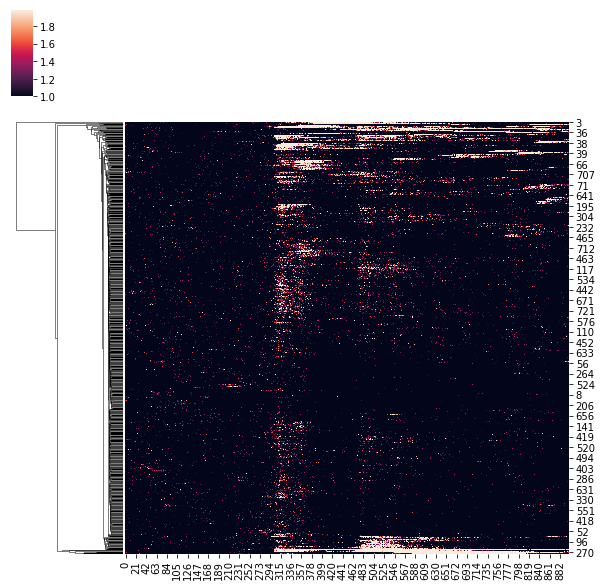

In [5]:
def avg_trace(a,b,c, cells, sliced):
    """
    Averages signal across the 3 discrete stimulus presentations. 
    a: df, stim 1
    b: df, stim 2
    c: df, stim 3
    cells: int, number of cells (number of rows in the df) 
    sliced: int, number of columns in the df 
    -----
    returns:
    s_avg_trace: df, average activity for each cell for the stim presentation
    s_5sec: df, average cell activity for five seconds after stimulus presention
    """
    q = np.zeros(shape= (cells,sliced))
    for i in range(len(a)):
        for j in range(len(a.iloc[i,:])):
            tmp1 = np.array([a.iloc[i,j], b.iloc[i,j], c.iloc[i,j]])
            tmp2 = np.mean(tmp1)
            q[i,j] = tmp2
    q = pd.DataFrame(q)
    w =  q.iloc[:,299:449]
    return q, w

s_avg, s_5s  = avg_trace(a,b,c,741,900)

sns.clustermap(s_avg, col_cluster=False, robust = True, vmin = 1)

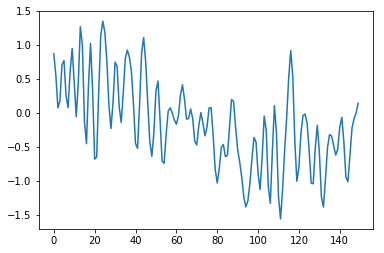

In [6]:
#random visualization junk
cell1 = s_5s.iloc[1,:]
axis = np.arange(0, 150, 1)
fig, ax = plt.subplots()
ax.plot(axis,cell1)

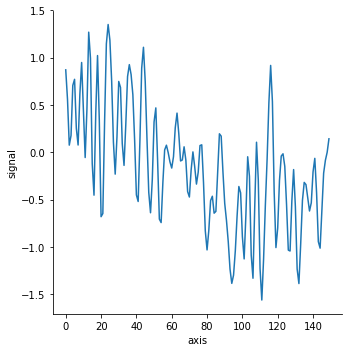

In [7]:
#and more
to_plot = pd.DataFrame(cell1)
to_plot.columns=['signal']
to_plot['axis'] = axis
sns.relplot(x='axis',y="signal", kind="line", data=to_plot)

In [8]:
#bootstrap to normal 
def bootstrap_resample(x, n=None):
    """
    bootstrap resample an array_like
    lifted from: https://gist.github.com/aflaxman/6871948
    ------
    x: array_like, data to resample
    n: int, optional, length of resampled array, len(x) if n=None
    ------
    returns: x_resamples, rebooted data
    """
    if isinstance(x, pd.Series):
        x = x.copy()
        x.index = range(len(x.index))
    if n == None:
        n = len(x)
    
    resample_i = np.floor(np.random.rand(n)*len(x)).astype(int)
    x_resample = np.array(x[resample_i])
    return x_resample


def con_int(data, confidence=0.95):
    """
    Calculates confidence interval using median of normally distributed data. 
    with data as pd.DataFrame, use in a for loop iterating over rows/cells. 
    -------
    returns: tuple, median, lower bound of interval, upper bound of interval
    """
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.median(a), st.sem(a)
    #r = st.wilcoxon(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

df_resampled = pd.DataFrame(index=s_5s.index, columns=s_5s.columns)

for col in s_5s.columns:
    df_resampled[col] = bootstrap_resample(s_5s[col])
    
CI = [con_int(df_resampled.iloc[i,:]) for i in range(len(df_resampled))]
CI = pd.DataFrame(CI)
CI.columns = ['median', 'lower_bound','upper_bound']

In [9]:
def get_CI_cells(s_5sec):
    """
    Calculates confidence interval and cells which do not have a negative lower bound. 
    Note: should probably split these into 2 different functions. 
    -----
    Inputs:
    s_5sec: df, 5 seconds after stim presentation, or whatever. 
    
    Returns:
    CI: df, for each cell, the median, and the lower/upper bounds of the CI
    cells_sig: list, cells/df indices which do not have a negative lower bound
    """
    df_resampled = pd.DataFrame(index=s_5sec.index, columns=s_5sec.columns)
    
    for col in s_5sec.columns:
        df_resampled[col] = bootstrap_resample(s_5sec[col])
        
    CI = [con_int(df_resampled.iloc[i,:]) for i in range(len(df_resampled))]
    CI = pd.DataFrame(CI)
    CI.columns = ['median', 'lower_bound','upper_bound']
    
    cells_sig = [] 
    for i in range(len(CI)):
        if CI.iloc[i,:].lower_bound > 0:
            cells_sig.append(i)
            
    return CI, cells_sig

CI, cells_sig = get_CI_cells(s_5s)